# Modeling Phase: Predicting Students' Exam Scores

## Introduction to the Modeling Phase
Following our comprehensive Exploratory Data Analysis (EDA), this section of the Jupyter Notebook transitions into the modeling phase. The aim here is to apply machine learning techniques to predict students' exam scores and uncover the factors that most significantly influence academic performance. We will leverage the insights gained from the EDA to inform our model selection, feature engineering, and evaluation strategies.

## Dataset Recap
We are working with the "Students Exam Scores: Extended Dataset," encompassing over 30,000 students with a variety of academic, socio-economic, and personal attributes. Our EDA has provided us with a nuanced understanding of these variables and their relationships, which will be instrumental in building predictive models.

## Objectives of the Modeling Phase
- **Feature Selection and Engineering**: Utilize the insights from the EDA to select the most relevant features and engineer new ones that could enhance the model's performance.
- **Model Selection and Training**: Choose appropriate machine learning models based on the nature of our data and the insights from the EDA. The focus will be on models that are best suited for predicting academic scores and interpreting the underlying factors.
- **Model Evaluation and Tuning**: Rigorously evaluate the performance of our models using appropriate metrics. Fine-tune the models to achieve the best balance between accuracy and generalization.
- **Interpretation of Results**: Interpret the models to understand how different features are influencing students' academic outcomes. This will provide valuable insights for educational strategies and interventions.

## Preparing for Predictive Insights
The modeling phase is not just about achieving high accuracy; it's also about gaining deeper insights into what drives students' academic performance. The ultimate goal is to provide actionable recommendations that could potentially guide educational policies and individualized student support strategies.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.exceptions import FitFailedWarning
import warnings




In [2]:

file_path = './modified_dataset2.csv'

# Loading the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Displaying the first few rows of the DataFrame
print(df.head())


   ParentEduc  PracticeSport  IsFirstChild  NrSiblings  WklyStudyHours  \
0           2              2             2           3               1   
1           5              3             2           0               0   
2           4              3             2           4               1   
3           1              1             1           1               0   
4           5              3             2           0               0   

   MathScore  ReadingScore  WritingScore  Overall_Score  Grades  ...  \
0         71            71            74          72.00       2  ...   
1         69            90            88          82.33       1  ...   
2         87            93            91          90.33       0  ...   
3         45            56            42          47.67       4  ...   
4         76            78            75          76.33       2  ...   

   EthnicGroup_group E  LunchType_standard  TestPrep_completed  TestPrep_none  \
0                False                Tru

In [3]:
df.columns

Index(['ParentEduc', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'WklyStudyHours', 'MathScore', 'ReadingScore', 'WritingScore',
       'Overall_Score', 'Grades', 'Gender_male', 'EthnicGroup_group A',
       'EthnicGroup_group B', 'EthnicGroup_group C', 'EthnicGroup_group D',
       'EthnicGroup_group E', 'LunchType_standard', 'TestPrep_completed',
       'TestPrep_none', 'ParentMaritalStatus_divorced',
       'ParentMaritalStatus_married', 'ParentMaritalStatus_single',
       'ParentMaritalStatus_widowed', 'TransportMeans_private',
       'TransportMeans_school_bus'],
      dtype='object')

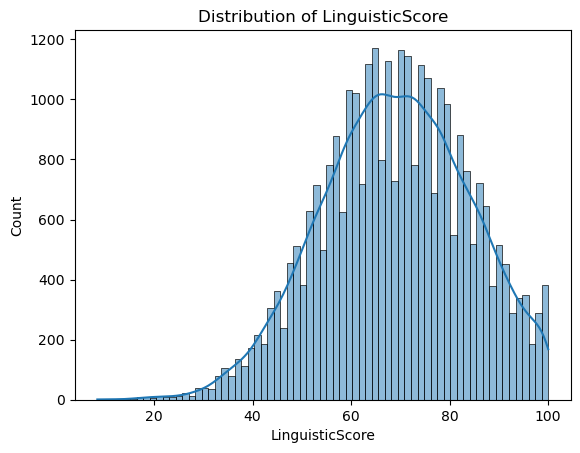

In [4]:

# Step 1: Create a new combined feature for linguistic ability
df['LinguisticScore'] = (df['ReadingScore'] + df['WritingScore']) / 2

# Exploring LinguisticScore
sns.histplot(df['LinguisticScore'], kde=True)
plt.title('Distribution of LinguisticScore')
plt.show()


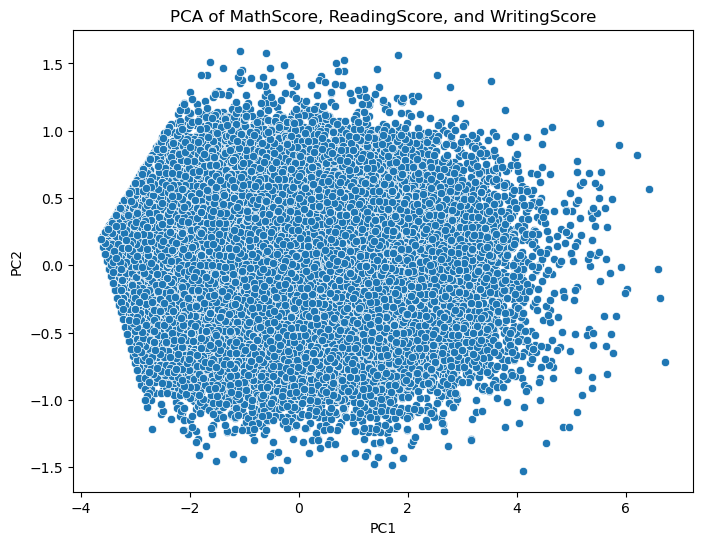

[0.90670441 0.0775639 ]


In [5]:
# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df[['MathScore', 'ReadingScore', 'WritingScore']])

# Applying PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features_scaled)
df_pca = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Exploring PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('PCA of MathScore, ReadingScore, and WritingScore')
plt.show()

# Explained variance ratio
print(pca.explained_variance_ratio_)



# Step 4: Exploring Non-linear Relationships
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['MathScore', 'ReadingScore']])
df_poly = pd.DataFrame(poly_features, columns=poly.get_feature_names(['MathScore', 'ReadingScore']))

# Exploring Polynomial Features
sns.pairplot(df_poly)
plt.show()


In [6]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


# Example: Predicting MathScore
# Assume df is previously defined
X = df.drop(['Overall_Score', 'Grades','MathScore', 'ReadingScore', 'WritingScore', 'LinguisticScore'], axis=1)  # Features
y = df['Overall_Score']               # Target

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [ 'sqrt'],  # 'auto' is valid for RandomForestRegressor
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid, cv=3, n_jobs=-1, verbose=2,
                           scoring='neg_mean_squared_error', error_score='raise')

grid_search.fit(X_train, y_train)
best_rf_params = grid_search.best_params_


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators

/Users/nilmonfortvila/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=s

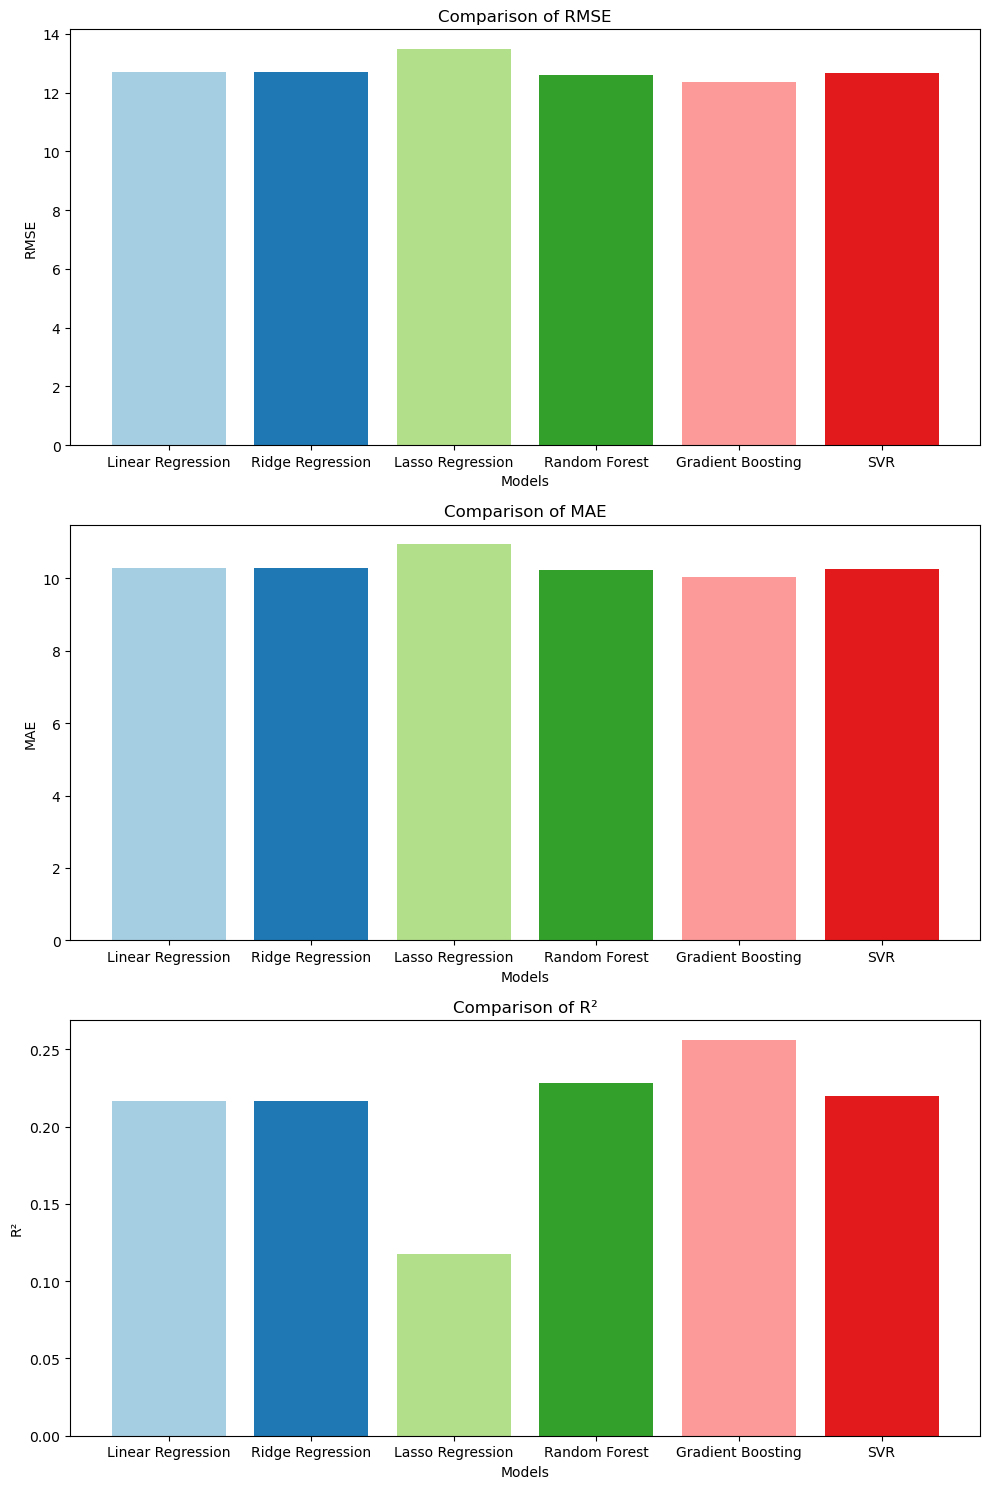

In [7]:

# Initialize models with the best parameters for Random Forest
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(**best_rf_params, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculating metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'RMSE': rmse, 'MAE': mae, 'R²': r2}

# Prepare data for bar chart
metrics = ['RMSE', 'MAE', 'R²']
performance = {metric: [results[model][metric] for model in models] for metric in metrics}
model_names = list(models.keys())

# Plotting the bar chart
fig, ax = plt.subplots(3, 1, figsize=(10, 15))
for i, metric in enumerate(metrics):
    ax[i].bar(model_names, performance[metric], color=plt.cm.Paired(np.arange(len(model_names))))
    ax[i].set_title(f'Comparison of {metric}')
    ax[i].set_ylabel(metric)
    ax[i].set_xlabel('Models')

plt.tight_layout()
plt.show()

In [8]:

# Displaying the results
print("\nModel Performance:")
for name, metrics in results.items():
    print(f"{name}: RMSE = {metrics['RMSE']}, MAE = {metrics['MAE']}, R² = {metrics['R²']}")



Model Performance:
Linear Regression: RMSE = 12.70574790928087, MAE = 10.2837159211722, R² = 0.21654999570985312
Ridge Regression: RMSE = 12.705703623730509, MAE = 10.283705598576919, R² = 0.21655545708912838
Lasso Regression: RMSE = 13.484287681668848, MAE = 10.930574758610021, R² = 0.117597281552548
Random Forest: RMSE = 12.61236344658307, MAE = 10.225101366504585, R² = 0.22802404598635462
Gradient Boosting: RMSE = 12.380285081260837, MAE = 10.026925126901865, R² = 0.256172708039449
SVR: RMSE = 12.680744460884958, MAE = 10.261567685787313, R² = 0.21963044048058322


## Overall Best Performing Models

In [9]:
# Find the best performing model based on a chosen metric
best_model_name = min(results, key=lambda k: results[k]['RMSE'])
best_model = models[best_model_name]

# Save the best model
#joblib.dump(best_model, 'final_model.joblib')

print(f"Best model based on RMSE: {best_model_name}")

Best model based on RMSE: Gradient Boosting


In [10]:
df.columns

Index(['ParentEduc', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'WklyStudyHours', 'MathScore', 'ReadingScore', 'WritingScore',
       'Overall_Score', 'Grades', 'Gender_male', 'EthnicGroup_group A',
       'EthnicGroup_group B', 'EthnicGroup_group C', 'EthnicGroup_group D',
       'EthnicGroup_group E', 'LunchType_standard', 'TestPrep_completed',
       'TestPrep_none', 'ParentMaritalStatus_divorced',
       'ParentMaritalStatus_married', 'ParentMaritalStatus_single',
       'ParentMaritalStatus_widowed', 'TransportMeans_private',
       'TransportMeans_school_bus', 'LinguisticScore'],
      dtype='object')